<a href="https://colab.research.google.com/github/SuchiBhargav/AI_Journey/blob/main/app.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import re #regular expression
import pandas as pd
import matplotlib.pyplot as plt
!pip install wordcloud matplotlib
from wordcloud import WordCloud
from wordcloud import STOPWORDS
!pip install emoji
import emoji
from collections import Counter
stopwords = set(STOPWORDS)


In [ ]:
def process_data(data):
  pattern = r"(\d{2}/\d{2}/\d{2}), (\d{1,2}:\d{2})[\u202F\s]?[ap]m - (.*?): (.*)"
  messages = re.findall(pattern, data)[1:]
  df = pd.DataFrame(messages, columns=['Date', 'Time', 'User', 'Message'])
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # 'coerce' sets invalid parsing to NaT
  # df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%y, %I:%M %p", errors='coerce')

  #Now you can safely extract the year
  df['year'] = df['Date'].dt.year
  df['month']=df['Date'].dt.month_name()
  df['day']=df['Date'].dt.day_name()
  df.drop(columns='Date',inplace=True)
  df = df[df["Message"]!="<Media omitted>"]
  return df

In [ ]:
file = open('/content/WhatsApp Chat with Something is calling 🤔.txt','r',encoding='utf-8')
data = file.read()
df = process_data(data)
print(df)

        Time          User                            Message  year  month  \
0       5:17  Vishal Iiitb       Kerala RTC ke site par jaoge  2023  March   
1       5:17  Vishal Iiitb    To bangalore to Sulthan bathery  2023  March   
2       5:17  Vishal Iiitb                        Jana padega  2023  March   
3       5:17  Vishal Iiitb             Sedhe wayanad nahi hai  2023  March   
4       5:17  Vishal Iiitb                 Par sleeper nahi h  2023  March   
...      ...           ...                                ...   ...    ...   
11415  10:41       SuchuU😎                                 🤘🏻  2025    May   
11416  10:42  Kirtan Iiitb                                Haa  2025    May   
11417  11:15       SuchuU😎  kisi k pass sbi ka credit card h?  2025   June   
11418  11:42  Vishal Iiitb              Credit card hi nhi h😭  2025   June   
11419  11:49       SuchuU😎                                  😥  2025   June   

            day  
0        Monday  
1        Monday  
2        

<ipython-input-48-891aa27caabc>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # 'coerce' sets invalid parsing to NaT


In [ ]:
media_omitted_rows = df[df['Message'].str.contains("<Media omitted>", na=False)]

# Display the filtered DataFrame
print(media_omitted_rows)

Empty DataFrame
Columns: [Time, User, Message, year, month, day]
Index: []


In [ ]:
file = open('/content/WhatsApp Chat with Something is calling 🤔.txt','r',encoding='utf-8')
data = file.read()
df = process_data(data)
#print(df)
#print(df['User'].unique())
user_message_counts= df['User'].value_counts()
user_count = (user_message_counts/user_message_counts.sum())*100
user_stats = pd.DataFrame({
    'User':user_message_counts.index,
    'percentage':user_count.values
})
print(user_stats)


                           User  percentage
0                       SuchuU😎   30.665434
1                  Vishal Iiitb   28.955638
2                NiikkuuU Iiitb   13.299445
3  Divyanshu Vijayvergiya Iiitb    8.844732
4            Kunal Sharma Iiitb    5.314233
5                 Navneet Iiitb    4.907579
6              Aman Gupta Iiitb    4.158965
7                  Kirtan Iiitb    2.227357
8                 shubham iiitb    1.626617


<ipython-input-48-891aa27caabc>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # 'coerce' sets invalid parsing to NaT


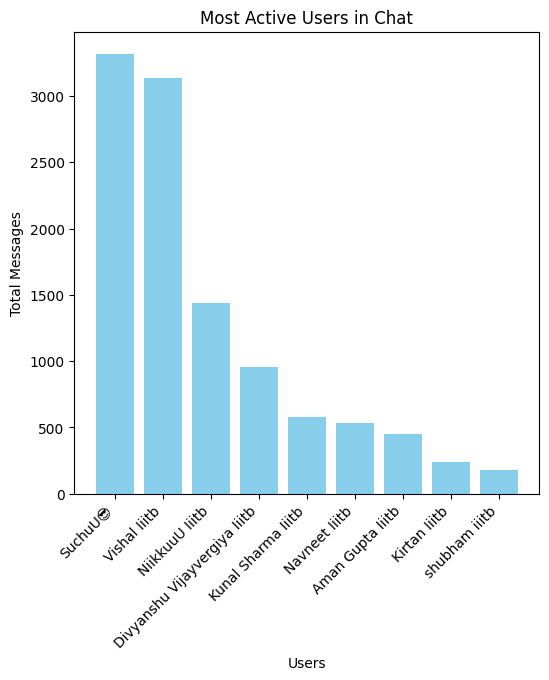

In [ ]:
plt.figure(figsize=(6, 6))
plt.bar(user_message_counts.index, user_message_counts.values, color='skyblue')
plt.xlabel("Users")
plt.ylabel("Total Messages")
plt.title("Most Active Users in Chat")
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
def WordCloud_generator(df):
    # Combine all messages into one string
    text = " ".join(msg for msg in df["Message"])
    #print(text)
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(text)
    plt.figure(figsize=(8,6))
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis("off")
    plt.title("Most active words")
    plt.show()

In [ ]:
# to find count of words
def most_used_words(df):
    words = text.split()  #split into words
    word_counts = Counter(words)
    top_words = word_counts.most_common(10)
    print(top_words)

    plt.figure(figsize=(8,6))
    plt.bar([word[0] for word in top_words], [word[1] for word in top_words], color='skyblue')
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.title("Top 10 Most Used Words")
    plt.show()



In [ ]:
def extract_emojis(text):
    return [char for char in text if emoji.is_emoji(char)]
def most_used_emojis(df):
    # Flatten all emojis from all messages into one list
    all_emojis = []
    for msg in df['Message']:
        if isinstance(msg, str):
            all_emojis.extend(extract_emojis(msg))

    # Count the most common emojis
    emoji_counts = Counter(all_emojis).most_common(8)

    # Display the result
    for emo, count in emoji_counts:
        print(f"{emo} : {count} times")


In [ ]:
#create piechart of emojis %
def piechart_emojis(df):
    plt.figure(figsize=(10,6))
    plt.pie([count for emo, count in emoji_counts], labels=[emo for emo, count in emoji_counts], autopct='%1.1f%%')
    plt.title("Most Used Emojis")
    plt.show()

In [ ]:
# Step 3: Count number of messages per year
def most_active_year(df):
      year_counts = df['year'].value_counts().sort_index()
      print(year_counts)
      # Step 4: Find most active year
      most_active_year = year_counts.idxmax()
      message_count = year_counts.max()

      print(f"Most active year: {most_active_year} with {message_count} messages")


      plt.figure(figsize=(8, 5))
      plt.bar(year_counts.index, year_counts.values, color='skyblue')
      plt.title("Messages per Year")
      plt.xlabel("Year")
      plt.ylabel("Number of Messages")
      plt.xticks(year_counts.index.astype(int))

      plt.tight_layout()
      plt.show()


In [ ]:
# Step 3: Count number of messages per month
def most_active_month(df):

      # Step 3: Define a proper month order (to avoid alphabetical order)
      month_order = ['January', 'February', 'March', 'April', 'May', 'June',
                    'July', 'August', 'September', 'October', 'November', 'December']

      # Step 4: Count messages by month name
      month_counts = df['month'].value_counts().reindex(month_order, fill_value=0)


      plt.figure(figsize=(8, 8))
      plt.bar(month_counts.index, month_counts.values, color='skyblue')
      plt.title("Messages per month")
      plt.xlabel("month")
      plt.ylabel("Number of Messages")
      # plt.xticks(month_counts.index.astype(int))

      plt.tight_layout()
      plt.show()

In [ ]:
# Step 3: Count number of messages per days
def most_active_days(df):

    # Step 3: Define a proper month order (to avoid alphabetical order)
    month_order = ['Sunday','Monday','Tuesday','Wednesday','Thrusday','Friday','Saturday']

    # Step 4: Count messages by month name
    month_counts = df['day'].value_counts().reindex(month_order, fill_value=0)


    plt.figure(figsize=(8, 8))
    plt.bar(month_counts.index, month_counts.values, color='skyblue')
    plt.title("Messages per day")
    # plt.xlabel("days")
    plt.ylabel("Number of Messages")
    # plt.xticks(month_counts.index.astype(int))

    plt.tight_layout()
    plt.show()

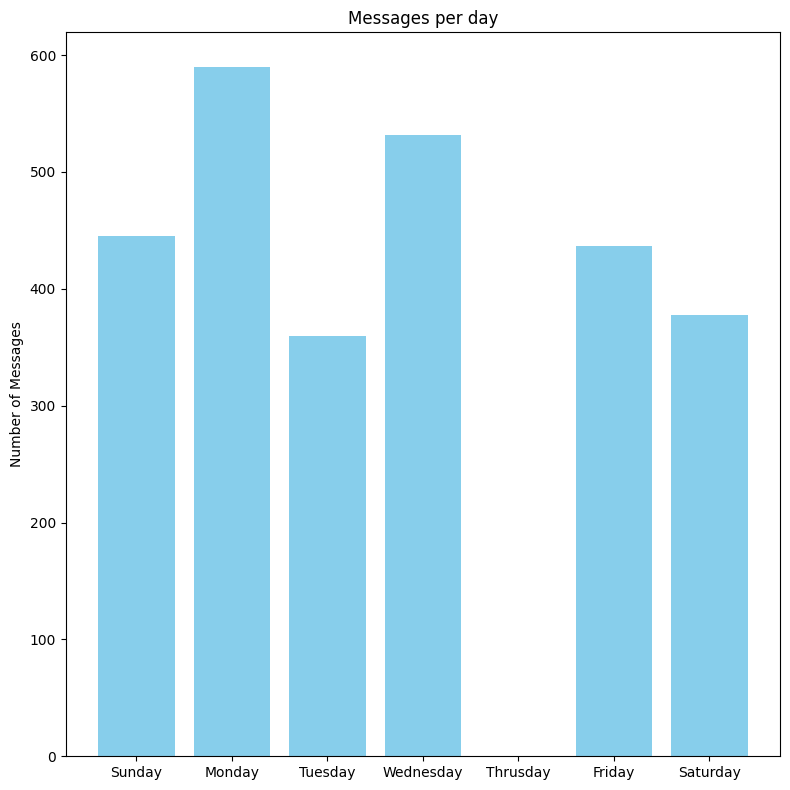

In [65]:
df_user = df[df['User']=="Vishal Iiitb"]
most_active_days(df_user)

